In [2]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import csv
from platform import python_version

print(python_version())
from numba import njit
from sklearn.metrics.pairwise import cosine_similarity

3.9.12


In [4]:
"""
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''
    
df_firstn = pd.read_csv('Cross Selling\Train.csv', converters={5: convert_dtype,8: convert_dtype,11: convert_dtype,15: convert_dtype})
df_firstn.head()
"""

#df_firstn = pd.read_csv('Cross Selling\Train.csv', low_memory=False,)
#df_firstn
df_firstn = pd.read_csv('train.csv')

C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_3564\2705320535.py:16: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_firstn = pd.read_csv('train.csv')


In [5]:
df_firstn.shape

(13647309, 48)

In [6]:
df_firstn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [9]:
df_firstn.isnull().sum() / df_firstn.shape[0] *100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.000000
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.000000
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [ ]:
#pycharm was used for the data cleansing
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

import statistics

data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

#########################################################################
# reduce data quantity to process with a few
# this is not used continuously, only to quickly debug code
sdata = data.iloc[0:5000, :]
sdata.to_csv('sdata.csv')
print(sdata)
#########################################################################

# print columns
print(data.columns)

# print head set
print(data.head())

# get shape of the data to visualise observations
print(data.shape)
# Dataset consists of 13647309 observations and 48 characteristics

# get description of data
print(data.describe)

# Examine NaN values across dataframe
# entire dataframe
nan_dataframe = data.isna().sum().sum()
print(f'Total Dataframe nan: {nan_dataframe}')


#######  Data Cleansing and Transformation

# strategy to replace nan values
# the strategy to replace the NaN values is explored with 0 and using mean values

filled_nan_dataframe = data.isna().sum().sum()
print(f'\nTotal NaN before fillna 0: {filled_nan_dataframe}')
data = data.fillna(0)

filled_nan_dataframe = data.isna().sum().sum()
print(f'Total NaN after fillna 0: {filled_nan_dataframe}')

print(f'Data for active cusotmers: {data.ind_nuevo.values}')
data_fill_nan = data.ind_nuevo.isna().sum().sum()
print(f'Total Dataframe nan after fillna mean: {data_fill_nan}')

# under customer  column
data_fill_nan = data.ind_nuevo.isna().sum().sum()
print(f'Customer active nan: {data_fill_nan}')

# Plot the percentiles using matplotlib
group = data.groupby('ind_nuevo')

#### Exploratory data analysis with seaborn
# Scatterplot analysis - age againts customer first contract holder
age_data = data.fillna(0)
sns.barplot(x=age_data. ind_cco_fin_ult1, y=age_data.ind_nuevo)
# sns.lmplot(x='age', y='ind_nuevo', data=age_data, fit_reg=False, hue='Stage')
plt.show()

sns.barplot(x=age_data. ind_cco_fin_ult1, y=age_data.ind_nuevo)
# sns.lmplot(x='age', y='ind_nuevo', data=age_data, fit_reg=False, hue='Stage')
#plt.show()

In [7]:
df_firstn.duplicated().sum()

0

In [11]:
df_firstn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [12]:
del_rows = df_firstn[df_firstn.ind_empleado.isnull()].index

In [13]:
df_firstn = df_firstn.drop(del_rows, axis = 0)

In [14]:
df_firstn.drop(['ult_fec_cli_1t', 'conyuemp', 'tipodom', 'cod_prov'], axis=1, inplace=True)

In [15]:
df_firstn['age'] = df_firstn['age'].astype(int) 
df_firstn['ncodpers'] = df_firstn['ncodpers'].astype(int)

In [16]:
num_columns = ['age', 'ncodpers', 'renta']

In [18]:
df_firstn[num_columns].describe().apply(lambda s: s.apply('{0:.0f}'.format))

,age,ncodpers,renta
count,13619575,13619575,10852934
mean,40,835079,134254
std,17,431578,230620
min,2,15889,1203
25%,24,452924,68711
50%,39,932180,101850
75%,50,1199354,155956
max,164,1553689,28894396


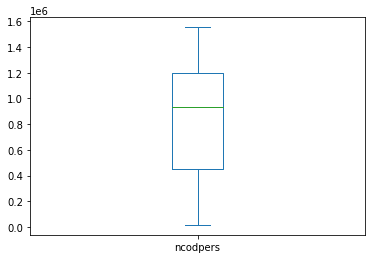

In [19]:
_, bp = df_firstn.ncodpers.plot.box(return_type='both')

In [20]:
df_firstn.loc[df_firstn.renta.isnull(), "renta"] = df_firstn.groupby(df_firstn.nomprov).renta.transform('mean')

NameError: name 'plot' is not defined

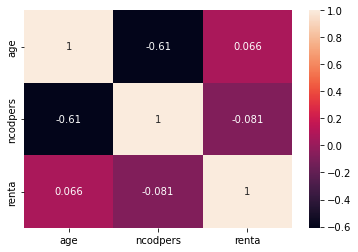

In [21]:
import seaborn as sns
sns.heatmap(df_firstn[num_columns].corr(), annot=True)
plot.show()

In [22]:
df_firstn.isnull()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13647305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13647306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13647307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df_firstn.isna().any().sum()

9

# EXPLORATORY DATA ANALYSIS (EDA)

In [25]:
pd.set_option("display.max_columns", None)

In [26]:
df_firstn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,MALAGA,1.0,87218.100000,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,S,KHE,N,CIUDAD REAL,0.0,35548.740000,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHE,N,CIUDAD REAL,0.0,122179.110000,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHD,N,ZARAGOZA,0.0,119775.540000,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,A,S,N,KHE,N,ZARAGOZA,1.0,110587.383626,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [27]:
len(df_firstn.antiguedad.unique())

506

In [28]:
df_firstn.shape[0]

13619575

In [29]:
#change column's name

df_firstn.rename(columns={'ncodpers': 'customer_code', 
                         'ind_empleado': 'employee_ind',
                         'pais_residencia': 'cust_country_residence',
                         'sexo': 'sex',
                         'ind_nuevo': 'new_cust_index',
                         'antiguedad': 'customer_seniority',
                         'indresi': 'residence_ind',
                         'indext': 'foreigner_ind',
                         'conyuemp': 'spouse_index',
                         'canal_entrada': 'channel',
                         'indfall': 'deceased_ind',
                         'tipodom': 'addres_type',
                         'nomprov': 'province_name',
                         'ind_actividad_cliente': 'activity_index',
                         'renta': 'income',
                         'segmento': 'segment',
                         'ind_ahor_fin_ult1': 'Saving_Account',
                         'ind_aval_fin_ult1': 'Guarantees',
                         'ind_cco_fin_ult1': 'Current_Accounts',
                         'ind_cder_fin_ult1': 'Derivada_Account',
                         'ind_cno_fin_ult1': 'Payroll_Account',
                         'ind_ctju_fin_ult1': 'Junior_Account',
                         'ind_ctma_fin_ult1': 'Más_particular_Account',
                         'ind_ctop_fin_ult1': 'Particular_Account',
                         'ind_ctpp_fin_ult1': 'Particular_Plus_Account',
                         'ind_deco_fin_ult1': 'Short_term_deposits',
                         'ind_deme_fin_ult1': 'Medium_term_deposits',
                         'ind_dela_fin_ult1': 'Long_term_deposits',
                         'ind_ecue_fin_ult1': 'e_account',
                         'ind_fond_fin_ult1': 'Funds',
                         'ind_hip_fin_ult1': 'Mortgage',
                         'ind_plan_fin_ult1': 'Pensions',
                         'ind_pres_fin_ult1': 'Loans',
                         'ind_reca_fin_ult1': 'Taxes',
                         'ind_tjcr_fin_ult1': 'Credit_Card',
                         'ind_valo_fin_ult1': 'Securities',
                         'ind_viv_fin_ult1': 'Home_Account',
                         'ind_nomina_ult1': 'Payroll',
                         'ind_nom_pens_ult1': 'Pensions_2',
                         'ind_recibo_ult1': 'Direct_Debit'}, inplace=True)

In [30]:
num_columns = ['age', 'customer_seniority', 'income']

NameError: name 'plt' is not defined

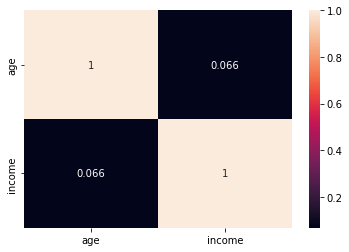

In [31]:
sns.heatmap(df_firstn[num_columns].corr(), annot=True)
plt.show()

In [32]:
products = ['Saving_Account', 'Guarantees',
       'Current_Accounts', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'Más_particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_term_deposits',
       'Medium_term_deposits', 'Long_term_deposits', 'e_account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities',
       'Home_Account', 'Payroll', 'Pensions_2', 'Direct_Debit']

In [33]:
df_firstn['total_products'] = df_firstn[products].sum(axis=1)

In [37]:
for prod in products:
    num_cl = df_firstn['customer_code'][df_firstn[prod] == 1].nunique()
    per_cl =df_firstn['customer_code'][df_firstn[prod] == 1].nunique() / df_firstn['customer_code'].nunique() * 100
    print(f'Number of clients who have {prod} = {num_cl} or {round(per_cl, 5)}% of all customers')

Number of clients who have Saving_Account = 89 or 0.00937% of all customers
Number of clients who have Guarantees = 23 or 0.00242% of all customers
Number of clients who have Current_Accounts = 619653 or 65.25314% of all customers
Number of clients who have Derivada_Account = 407 or 0.04286% of all customers
Number of clients who have Payroll_Account = 85063 or 8.95764% of all customers
Number of clients who have Junior_Account = 8754 or 0.92185% of all customers
Number of clients who have Más_particular_Account = 17544 or 1.84749% of all customers
Number of clients who have Particular_Account = 107642 or 11.33534% of all customers
Number of clients who have Particular_Plus_Account = 37032 or 3.89969% of all customers
Number of clients who have Short_term_deposits = 6521 or 0.6867% of all customers
Number of clients who have Medium_term_deposits = 1846 or 0.19439% of all customers
Number of clients who have Long_term_deposits = 47251 or 4.97581% of all customers
Number of clients who h

In [39]:
total_prod_by_cust =  df_firstn.groupby('customer_code')[products].sum()

In [40]:
for prod in products:
    total_prod_by_cust[prod] = total_prod_by_cust[prod].apply(lambda x: 1 if x > 0 else 0)

In [41]:
total_prod_by_cust['total_products'] = total_prod_by_cust.sum(axis=1)

In [42]:
total_prod_by_cust = total_prod_by_cust.drop(total_prod_by_cust[total_prod_by_cust.total_products == 0].index)
df_firstn = df_firstn.drop(df_firstn[df_firstn.total_products == 0].index)

Text(0.5, 1.0, 'Products distribution')

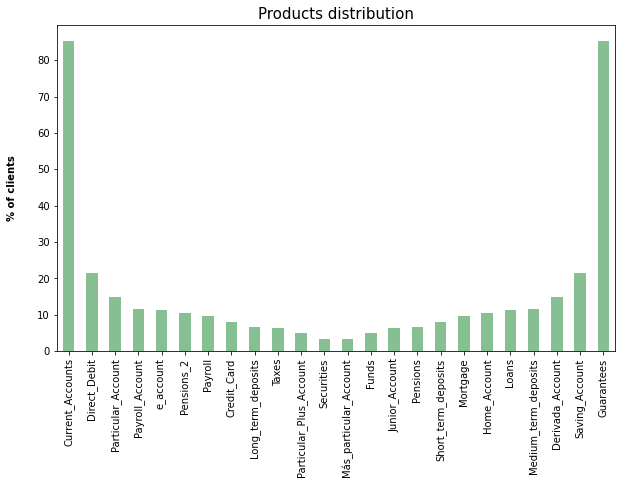

In [43]:
data = total_prod_by_cust[products].sum().sort_values(ascending=True) / total_prod_by_cust.shape[0] * 100 #).plot(kind='bar').set_title('Products distribution')

ax = data.plot(kind='bar', grid=False, figsize=(10,6), color='#86bf91', zorder=2)
ax.set_ylabel("% of clients", labelpad=20, weight='bold', size=10)
ax.set_title("Products distribution", size=15)

data = total_prod_by_cust[products].sum().sort_values(ascending=False) / total_prod_by_cust.shape[0] * 100 #).plot(kind='bar').set_title('Products distribution')

ax = data.plot(kind='bar', grid=False, figsize=(10,6), color='#86bf91', zorder=2)
ax.set_ylabel("% of clients", labelpad=20, weight='bold', size=10)
ax.set_title("Products distribution", size=15)

In [46]:
dict_products = {'Credit_Card': 58615,
                'Current_Accounts': 619653,
                'Direct_Debit': 156755,
                'Funds': 17294,
                'Long_term_deposits': 47251,
                'Más_particular_Account': 17544,
                'Particular_Account': 107642,
                'Particular_Plus_Account': 37032,
                'Payroll': 70257,
                'Payroll_Account': 85061,
                'Pensions_2': 75400,
                'Securities': 24029,
                'Taxes': 45894,
                'e_account': 81384,
                 'other': 36156}

<AxesSubplot:>

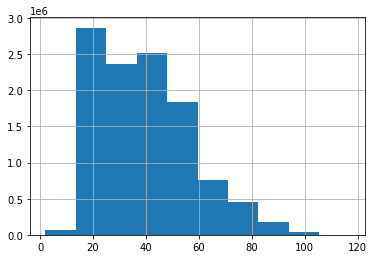

In [47]:
df_firstn.age.hist()

In [48]:
def func_ages_group(x):
    if x == 15:
        return "<16"
    elif x == 16 and x <= 30:
        return "21-40"
    elif x == 31 and x <= 55:
        return "31-55"
    else:
        return ">55"


df_firstn['age_group']  = df_firstn['age'].apply(func_ages_group)

In [49]:
total_prod_by_cust = total_prod_by_cust.reset_index(level=0)

In [50]:
total_prod_by_cust = total_prod_by_cust.merge(df_firstn[['customer_code','age_group']], on='customer_code')

In [51]:
def pie_plot(data, figsize, title, fontsize):

    pie, ax = plt.subplots(figsize=figsize)
    labels = data.keys()
    plt.pie(x=data, autopct="%.1f%%", labels=list(labels), pctdistance=0.5)
    plt.title(title, fontsize=fontsize)
    # pie.savefig("Total_users.png")

In [55]:
age_groups = total_prod_by_cust.age_group.unique()
for gr in age_groups:
    data = total_prod_by_cust[products][total_prod_by_cust.age_group == gr].sum().sort_values(ascending=False).head(10)
    pie_plot(data, [15,10], f'Product distribution by the age group {gr}', 12)

MemoryError: Unable to allocate 2.14 GiB for an array with shape (26, 11069204) and data type int64

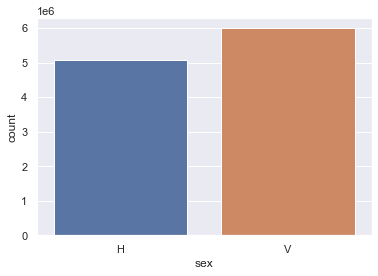

In [56]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="sex", data=df_firstn)

In [57]:
def func_segment_group(x):
    if x <= 50000:
        return "income less 50 000"
    elif x > 50000 and x <= 300000:
        return "income 50 000 - 300 000"
    elif x > 300000 and x <= 500000:
        return "income 300 000 - 500 000"
    else:
        return "income more than 500 000"


df_firstn['income_group']  = df_firstn['income'].apply(func_segment_group)

In [58]:

df_for_merge = df_firstn[['customer_code','income_group']].drop_duplicates()

MemoryError: Unable to allocate 1.32 GiB for an array with shape (16, 11069204) and data type object

In [8]:
total_prod_by_cust = total_prod_by_cust.merge(df_for_merge, on='customer_code')

NameError: name 'total_prod_by_cust' is not defined

In [ ]:
segm_groups = total_prod_by_cust.income_group.unique()
for gr in segm_groups:
    data = total_prod_by_cust[products][total_prod_by_cust.income_group == gr].sum().sort_values(ascending=False).head(10)
    pie_plot(data, [20,12], f'Product distribution by the income group {gr}', 12)

In [82]:

products

['Saving_Account',
 'Guarantees',
 'Current_Accounts',
 'Derivada_Account',
 'Payroll_Account',
 'Junior_Account',
 'Más_particular_Account',
 'Particular_Account',
 'Particular_Plus_Account',
 'Short_term_deposits',
 'Medium_term_deposits',
 'Long_term_deposits',
 'e_account',
 'Funds',
 'Mortgage',
 'Pensions',
 'Loans',
 'Taxes',
 'Credit_Card',
 'Securities',
 'Home_Account',
 'Payroll',
 'Pensions_2',
 'Direct_Debit']

In [83]:
df_firstn

,fecha_dato,customer_code,employee_ind,cust_country_residence,sex,age,fecha_alta,new_cust_index,customer_seniority,indrel,indrel_1mes,tiprel_1mes,residence_ind,foreigner_ind,channel,deceased_ind,province_name,activity_index,income,segment,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,Particular_Account,Particular_Plus_Account,Short_term_deposits,Medium_term_deposits,Long_term_deposits,e_account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_2,Direct_Debit,total_products,age_group,income_group
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,MALAGA,1.0,87218.100000,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,S,KHE,N,CIUDAD REAL,0.0,35548.740000,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income less 50 000
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHE,N,CIUDAD REAL,0.0,122179.110000,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHD,N,ZARAGOZA,0.0,119775.540000,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,A,S,N,KHE,N,ZARAGOZA,1.0,110587.383626,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,1,I,S,N,KHE,N,ZARAGOZA,0.0,43912.170000,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income less 50 000
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,1,I,S,N,KHE,N,"RIOJA, LA",0.0,23334.990000,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income less 50 000
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,1,A,S,N,KHE,N,ZARAGOZA,1.0,110587.383626,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,1.0,I,S,N,KHE,N,ZARAGOZA,0.0,199592.820000,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000


In [84]:
import scipy.stats as ss

In [85]:
categorical_columns = ['employee_ind', 'cust_country_residence',
       'sex','new_cust_index',
       'indrel', 'indrel_1mes', 'tiprel_1mes', 'residence_ind',
       'foreigner_ind', 'channel', 'deceased_ind', 'province_name',
       'activity_index', 'segment', 'Saving_Account', 'Guarantees',
       'Current_Accounts', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'Más_particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_term_deposits',
       'Medium_term_deposits', 'Long_term_deposits', 'e_account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities',
       'Home_Account', 'Payroll', 'Pensions_2', 'Direct_Debit',
       'total_products', 'age_group', 'income_group']

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

for prod in products:
    for col in categorical_columns:
        if prod != col:
            confusion_matrix = pd.crosstab(df_firstn[col], df_firstn[prod])
            res = cramers_v(confusion_matrix.values)
            if res > 0.3: 
                print(f'Cramers V statistic for {prod} - {col} association = {res}')

Cramers V statistic for Current_Accounts - channel association = 0.3401878333632642
Cramers V statistic for Current_Accounts - segment association = 0.3080386318145122
Cramers V statistic for Current_Accounts - Payroll_Account association = 0.5952205923989303
Cramers V statistic for Current_Accounts - Payroll association = 0.4499034532115655
Cramers V statistic for Current_Accounts - Pensions_2 association = 0.4725123434831534
Cramers V statistic for Current_Accounts - total_products association = 0.3668069873390315
Cramers V statistic for Payroll_Account - tiprel_1mes association = 0.30102797652606655


Crossselling products Recommendations:

It is recommended that no matter how much the customers earn, Long-term deposits can be offered for customers of aged 65 and above. For customer under the age of 20, banks can offer direct debits, electronic transfer and Junior accouts to them and also recommend that they can build a system that offers products depending on customers data.

In [87]:
total_prod_by_cust = df_firstn.groupby('customer_code')[products].sum()

MemoryError: Unable to allocate 1.81 GiB for an array with shape (22, 11069204) and data type int64

In [88]:
for prod in products:
    total_prod_by_cust[prod] = total_prod_by_cust[prod].apply(lambda x: 1 if x > 0 else 0)

In [89]:
del_rows = total_prod_by_cust[(total_prod_by_cust[products].sum(axis=1) == 0) | (total_prod_by_cust[products].sum(axis=1) == 1)].index

MemoryError: Unable to allocate 2.47 GiB for an array with shape (28, 11844014) and data type int64

In [ ]:
total_prod_by_cust = total_prod_by_cust.drop(del_rows, axis = 0)

In [ ]:
total_prod_by_cust.head()

In [ ]:
total_prod_by_cust.shape

In [ ]:
data = pd.melt(total_prod_by_cust.reset_index(), id_vars=['customer_code'])
data = data.sample(frac=1, axis=0).reset_index(drop=True)
data.columns = ['customer_id', 'product_name', 'is_purchase']

In [ ]:
pdp_data = pd.pivot_table(data,index = 'customer_id',columns = 'product_name',values = 'is_purchase')
pdp_data.reset_index(inplace=True)
pdp_data = pdp_data.fillna(0)
pdp_data = pdp_data.drop('customer_id', axis=1)

In [ ]:
pdp_data

In [ ]:
co_matrix = pdp_data.T.dot(pdp_data)
np.fill_diagonal(co_matrix.values, 0)

In [ ]:
from numba import njit
from sklearn.metrics.pairwise import cosine_similarity

cos_score_data = pd.DataFrame(cosine_similarity(co_matrix))
cos_score_data.index = co_matrix.index
cos_score_data.columns = np.array(co_matrix.index)

In [ ]:
product_recs = []
for i in cos_score_data.index:
    product_recs.append(cos_score_data[cos_score_data.index!=i][i].sort_values(ascending = False)[0:7].index)
    
product_recs_data = pd.DataFrame(product_recs)
product_recs_data.index = cos_score_data.index

In [ ]:

product_recs_data